<a href="https://colab.research.google.com/github/anqi-guo/udacity-dsnd-blog-post/blob/main/calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/study/DSND/airbnb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv(f'{PATH}/data/calendar-202112-sh.csv')

In [3]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5661881,2021-12-24,f,$429.00,$429.00,1.0,30.0
1,5661881,2021-12-25,f,$429.00,$429.00,1.0,30.0
2,5661881,2021-12-26,f,$399.00,$399.00,1.0,30.0
3,5661881,2021-12-27,f,$399.00,$399.00,1.0,30.0
4,5661881,2021-12-28,f,$399.00,$399.00,1.0,30.0


In [4]:
df.shape

(10645228, 7)

In [5]:
df['listing_id'].nunique()

29165

In [6]:
df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].apply(lambda x: float(x[1:].replace(',','')) if type(x)==str else x)
df['adjusted_price'] = df['adjusted_price'].apply(lambda x: float(x[1:].replace(',','')) if type(x)==str else x)
df.sort_values(by=['listing_id', 'date'], inplace=True)

# Price Change

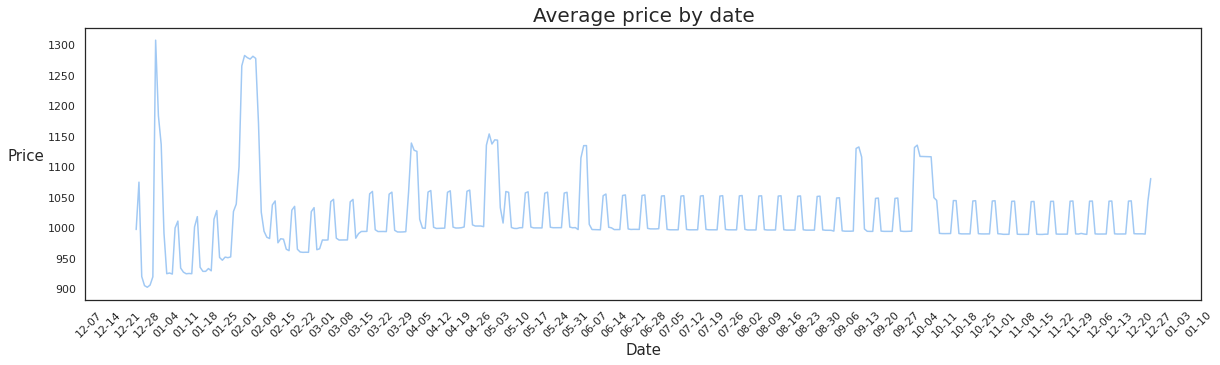

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

#sns.set(rc = {'figure.figsize':(20,5)})
colors = sns.color_palette('pastel')
sns.set_theme(style='white')

data = df.groupby('date')['price'].mean().reset_index()
data.columns = ['date', 'price']

fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data=data, x='date', y='price', color=colors[0]);

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1));
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%m-%d'));
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45);

plt.title('Average price by date', fontsize=20);
plt.xlabel(xlabel='Date', fontsize=15);
plt.ylabel(ylabel='Price', rotation=0, ha='right', fontsize=15);
plt.savefig(f'{PATH}/pics/average_price_by_date.png', bbox_inches='tight')

In [27]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
38,24963,2021-12-24,f,480.0,480.0,3.0,365.0
39,24963,2021-12-25,f,480.0,480.0,3.0,365.0
40,24963,2021-12-26,f,480.0,480.0,3.0,365.0
41,24963,2021-12-27,f,480.0,480.0,3.0,365.0
42,24963,2021-12-28,f,480.0,480.0,3.0,365.0


In [31]:
df_listings = pd.read_csv(f'{PATH}/data/listings-202112-sh.csv')

data = df[['listing_id', 'date','price']].merge(df_listings[['id', 'neighbourhood']], left_on='listing_id', right_on='id', how='left')
data['neighbourhood'] = data['neighbourhood'].apply(lambda x: x.split('/')[1].strip())

data_ = data.groupby(['neighbourhood', 'date'])['price'].mean().reset_index()
data_.head()

,neighbourhood,date,price
0,Baoshan District,2021-12-24,651.196970
1,Baoshan District,2021-12-25,796.517827
2,Baoshan District,2021-12-26,723.699491
3,Baoshan District,2021-12-27,709.582343
4,Baoshan District,2021-12-28,704.876061


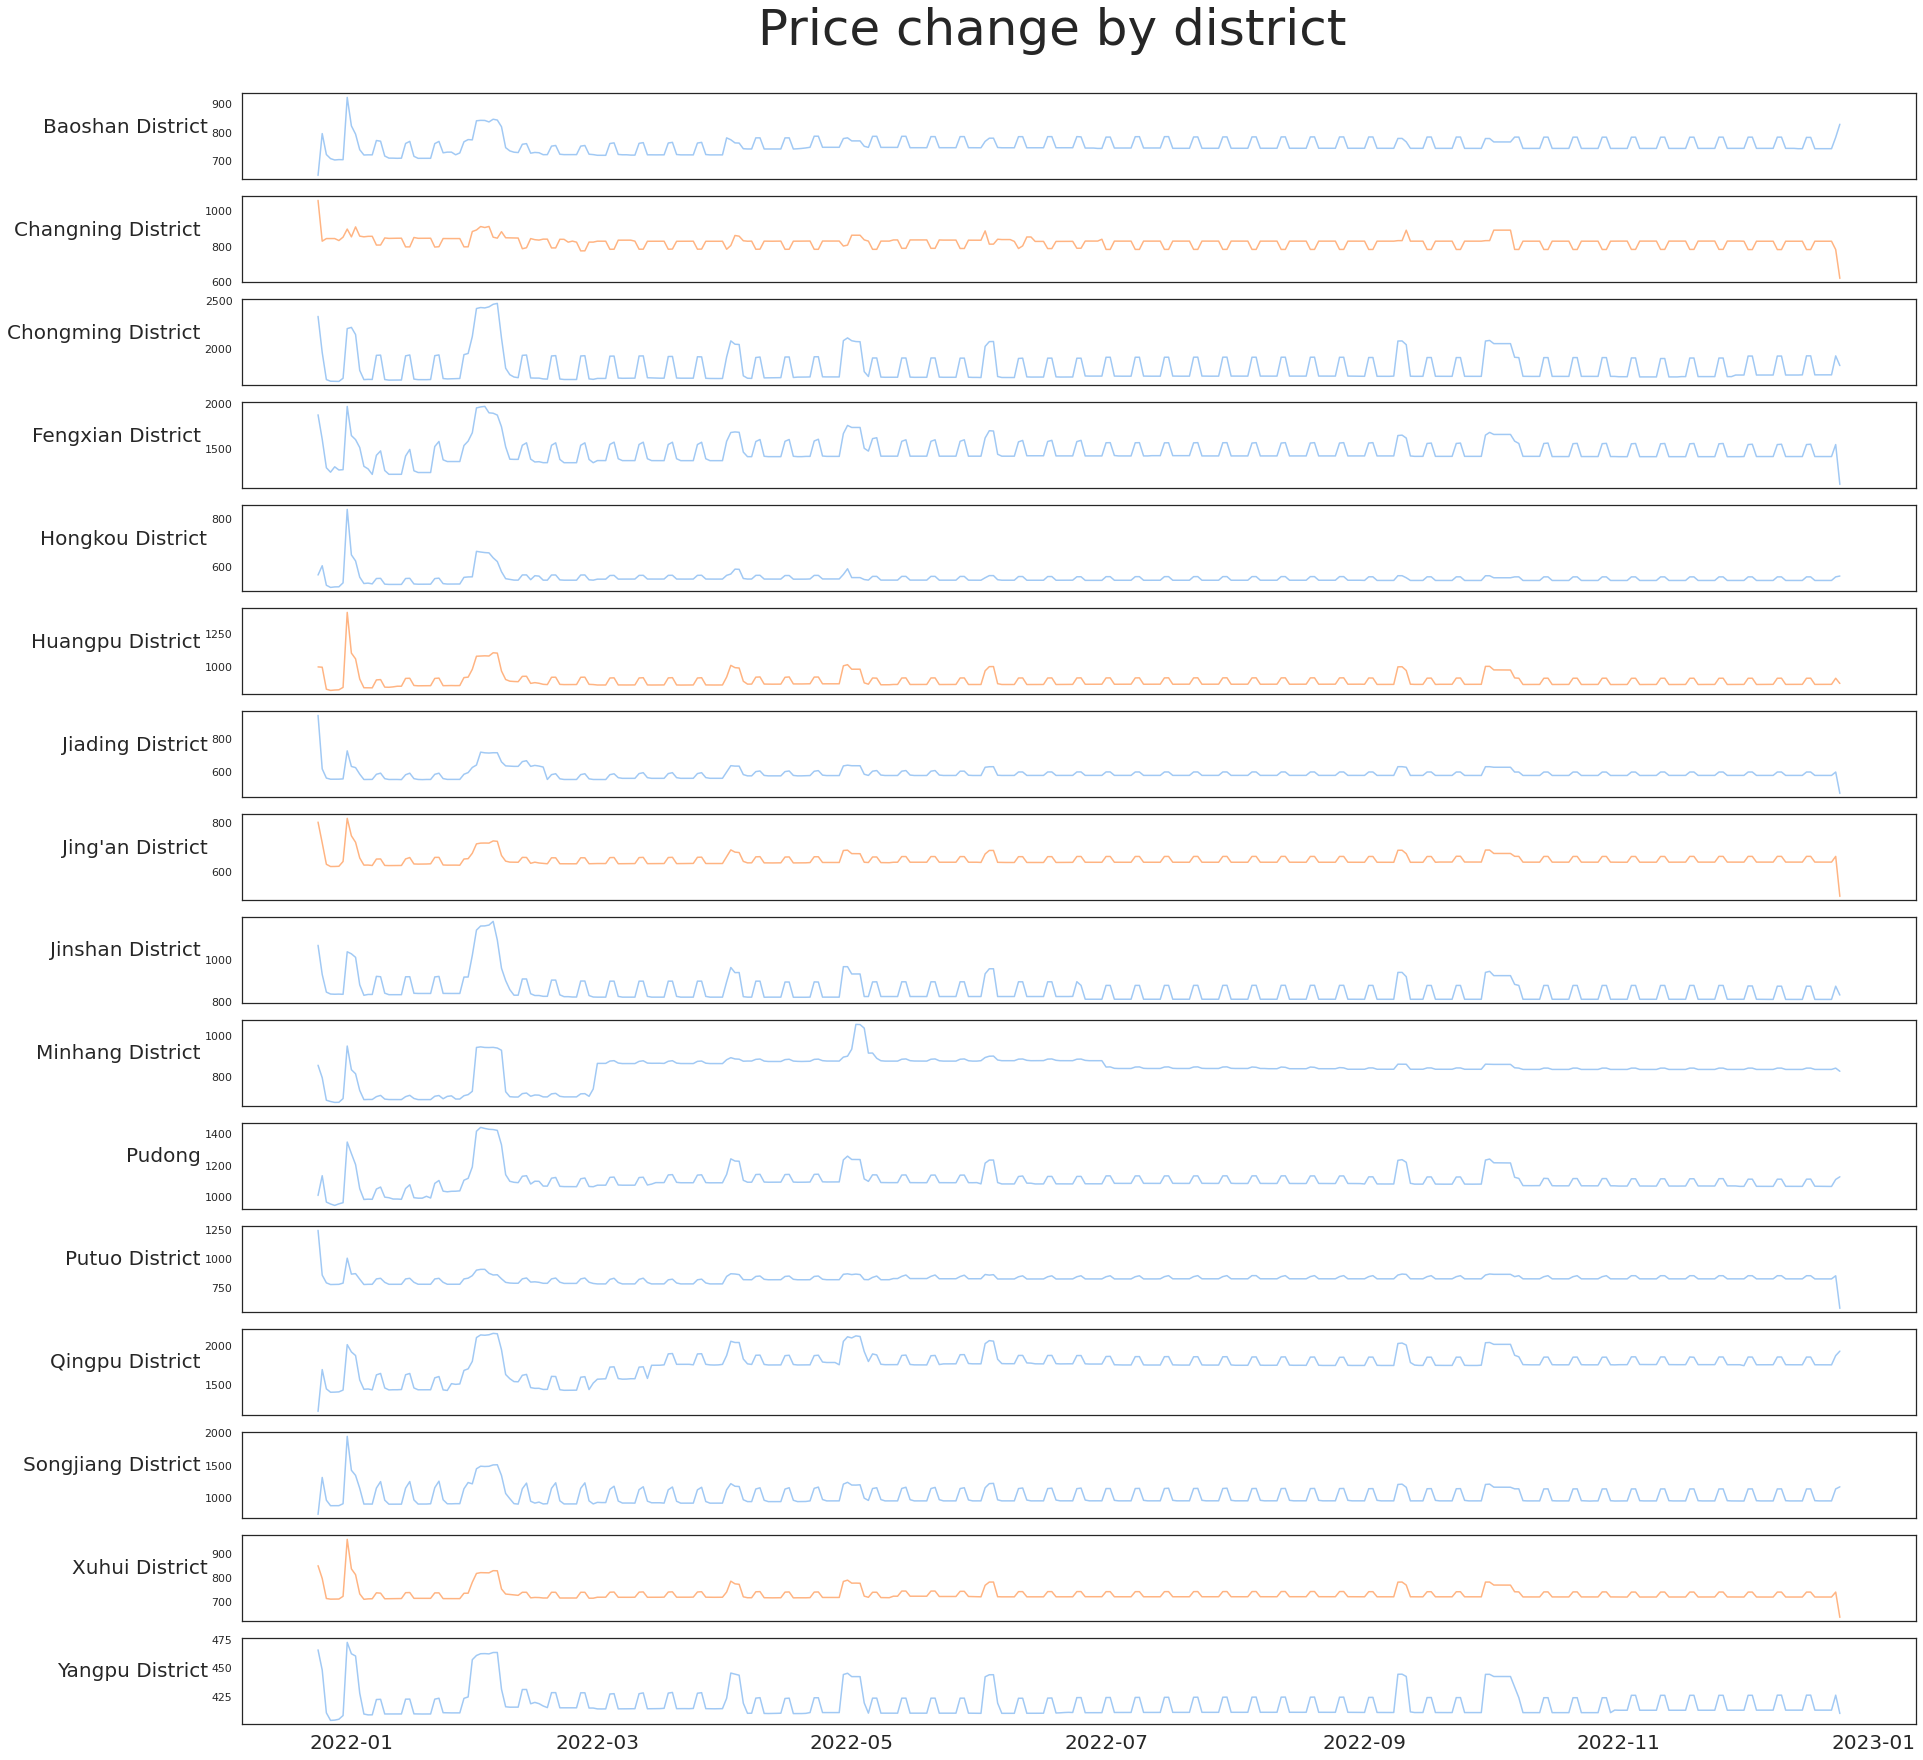

In [40]:
neighbourhoods = data_['neighbourhood'].unique()

fig, ax = plt.subplots(len(neighbourhoods), 1, sharex=True, figsize=(30,30))

for i, n in enumerate(neighbourhoods):
  data_i = data_[data_['neighbourhood']==n]

  if n in ['Changning District', 'Huangpu District', "Jing'an District", 'Xuhui District']:
    c = colors[1]
  else:
    c = colors[0]
  ax[i].plot(data_i['date'], data_i['price'], color=c)
  ax[i].set_ylabel(n, rotation=0, ha='right', fontsize=20)
  ax[i].tick_params(axis='x', which='major', labelsize=20)

fig.suptitle('Price change by district', fontsize=50, y=.92)
fig.savefig(f'{PATH}/pics/price_change_by_district.png', bbox_inches='tight')